In [23]:
two_moons_state_dict = "/data_docker/mlartifacts/262474978940515547/64734b4d986f468080aed4596949bde2/artifacts/model/state_dict.pth"
figure_6_state_dict = "/data_docker/mlartifacts/160662818887874364/874a22fa439647f793c33016488a073a/artifacts/model/state_dict.pth"

all_fig_6_dicts = {
    "0.0": "/data_docker/mlartifacts/160662818887874364/35fe46aa7f5545899eb1a3bdd01bff70/artifacts/model/state_dict.pth",
    "0.1": "/data_docker/mlartifacts/160662818887874364/3153001434ce4713b5be1a6f4c6af925/artifacts/model/state_dict.pth",
    "0.3": "/data_docker/mlartifacts/160662818887874364/be862bfb97094b7db5f47098fc14d2e0/artifacts/model/state_dict.pth",
    "0.7": "/data_docker/mlartifacts/160662818887874364/2076816b4cd24584880cb08e2e0dcdd8/artifacts/model/state_dict.pth",
    "0.9": "/data_docker/mlartifacts/160662818887874364/b9eefbcaa75440f7886711d1c7c73a59/artifacts/model/state_dict.pth",
    "1.0": "/data_docker/mlartifacts/160662818887874364/efe93e96fb7942c5b8e805afa7592189/artifacts/model/state_dict.pth"
} 

In [9]:
from ResNetSPN import DenseResNetSPN
from simple_einet.layers.distributions.normal import RatNormal
dataset = "figure6"

leaf_type = RatNormal
leaf_kwargs = {
    "min_sigma": 0.000001,
    "max_sigma": 5.0,  # good for twomoons
    # "max_sigma": 50.0,  # good for figure6
    # "max_sigma": 20.0,
}
if "figure6" in dataset:
    # lambda should be 0.3 or 0.5
    num_classes=3
    einet_depth = 3
    einet_num_sums = 10
    einet_num_leaves = 15
    einet_num_repetitions = 11
elif "two-moons" in dataset:
    # (also works for figure6 with dropout=0.01, but occams razor: smaller model is better)
    # lambda should be 0.5 or 0.7
    num_classes=2
    einet_depth = 5
    einet_num_sums = 10
    einet_num_leaves = 15
    einet_num_repetitions = 11
model = DenseResNetSPN(
    num_classes=num_classes,
    input_dim=2,
    num_layers=3,
    num_hidden=32,
    spec_norm_bound=0.95,
    einet_depth=einet_depth,
    einet_num_sums=einet_num_sums,
    einet_num_leaves=einet_num_leaves,
    einet_num_repetitions=einet_num_repetitions,
    einet_leaf_type=leaf_type,
    einet_leaf_kwargs=leaf_kwargs,
    einet_dropout=0.0, 
)

In [10]:
import torch
if dataset == "two-moons":
    model.load_state_dict(torch.load(two_moons_state_dict, map_location="cpu"))
elif dataset == "figure6":
    model.load_state_dict(torch.load(figure_6_state_dict, map_location="cpu"))
model.activate_uncert_head()

# Twomoons

In [4]:
import numpy as np
import sklearn.datasets

def make_testing_data():
    """Create a mesh grid in 2D space."""
    DEFAULT_X_RANGE = (-3.5, 3.5)
    DEFAULT_Y_RANGE = (-2.5, 2.5)
    DEFAULT_N_GRID = 100
    x_range = DEFAULT_X_RANGE
    y_range = DEFAULT_Y_RANGE
    n_grid = DEFAULT_N_GRID
    # testing data (mesh grid over data space)
    x = np.linspace(x_range[0], x_range[1], n_grid).astype(np.float32)
    y = np.linspace(y_range[0], y_range[1], n_grid).astype(np.float32)
    xv, yv = np.meshgrid(x, y)
    return np.stack([xv.flatten(), yv.flatten()], axis=-1)

def make_training_data(sample_size=500):
    """Create two moon training dataset."""
    train_examples, train_labels = sklearn.datasets.make_moons(
        n_samples=2 * sample_size, noise=0.1
    )

    # Adjust data position slightly.
    train_examples[train_labels == 0] += [-0.1, 0.2]
    train_examples[train_labels == 1] += [0.1, -0.2]

    return train_examples.astype(np.float32), train_labels.astype(np.int32)

def make_ood_data(sample_size=500, means=(2.5, -1.75), vars=(0.01, 0.01)):
    return np.random.multivariate_normal(
        means, cov=np.diag(vars), size=sample_size
    ).astype(np.float32)

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


entropy:  [0.6931449  0.6931165  0.6930611  0.69298553 0.6928948 ]


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


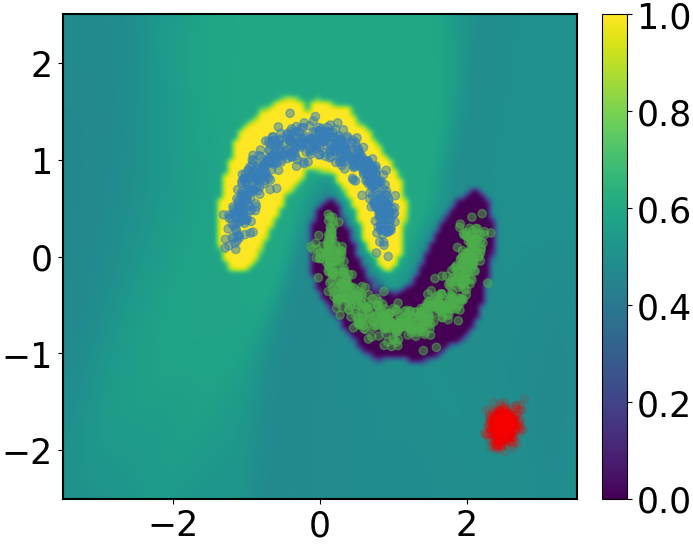

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


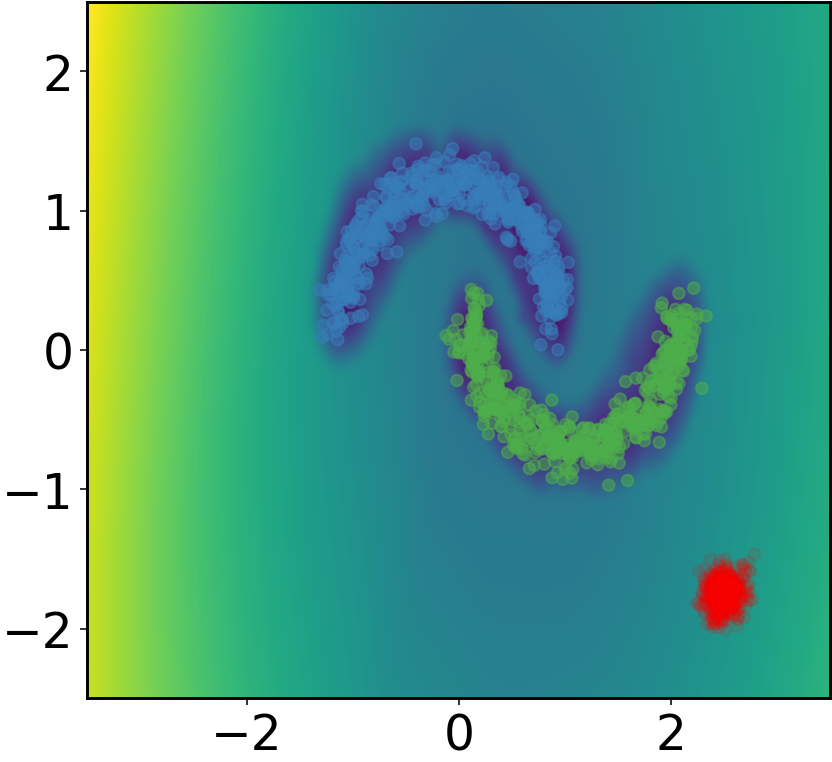

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


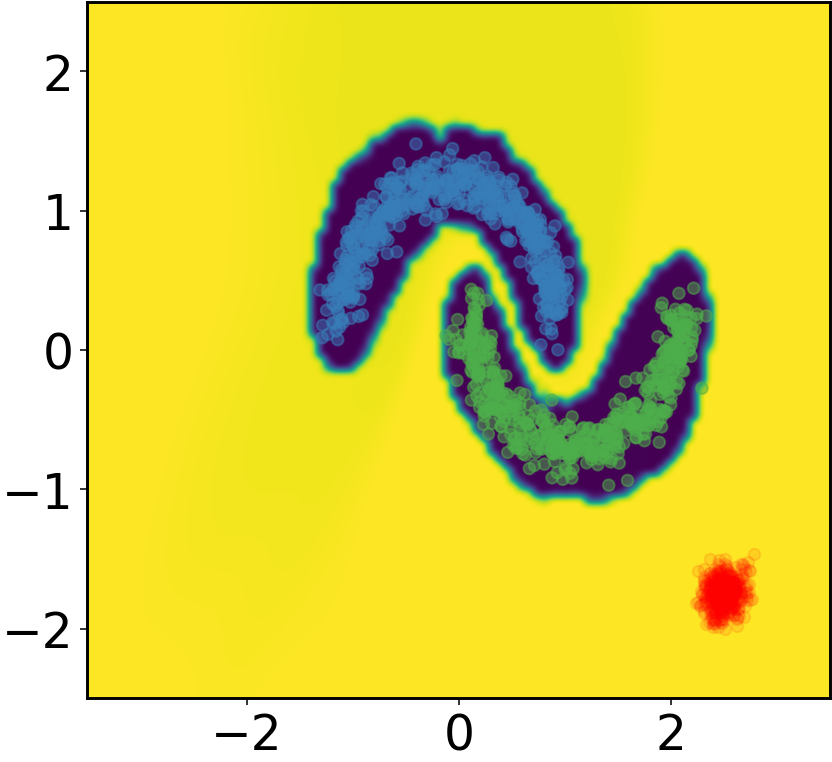

In [5]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from plotting_utils import plot_uncertainty_surface

train_examples, train_labels = make_training_data(sample_size=500)
test_examples = make_testing_data()
ood_examples = make_ood_data(sample_size=500)
test_examples = make_testing_data()

test_dl = DataLoader(
            test_examples,
            batch_size=512,
            pin_memory=False,
            num_workers=1,
        )

# Visualize SPN posterior
device = "cpu"
posteriors = model.eval_posterior(None, device, test_dl, return_all=True)
# posteriors = torch.exp(posteriors)
# use softmax instead of exp, because we want to normalize the posteriors
posteriors = torch.softmax(posteriors, dim=1)
# take the probability of class 0 as the uncertainty
# if p==1 -> no uncertainty, if p==0 -> high uncertainty
probs_class_0 = posteriors[:, 0].cpu().detach().numpy()
fig, ax = plt.subplots(figsize=(7, 5.5))
pcm = plot_uncertainty_surface(
    train_examples,
    train_labels,
    probs_class_0,
    ax=ax,
    ood_examples=ood_examples,
)
clb = plt.colorbar(pcm, ax=ax)
clb.ax.tick_params(labelsize=25)
# plt.show()
plt.savefig("posterior_class_probability.pdf")

lls = model.eval_ll_marg(None, device, test_dl, return_all=True)
nll = -(lls.cpu().detach().numpy())  # negative log likelihood
fig, ax = plt.subplots(figsize=(6, 5.5))
pcm = plot_uncertainty_surface(
    train_examples, train_labels, nll, ax=ax, ood_examples=ood_examples
)
# plt.colorbar(pcm, ax=ax)
plt.savefig("nll.pdf")

entropy = -torch.sum(posteriors * torch.log(posteriors), axis=1)
entropy = entropy.cpu().detach().numpy()
print("entropy: ", entropy[:5])
fig, ax = plt.subplots(figsize=(6, 5.5))
pcm = plot_uncertainty_surface(
    train_examples, train_labels, entropy, ax=ax, ood_examples=ood_examples
)
plt.savefig("posterior_predictive_entropy.pdf")

# Figure6

In [15]:
def generate_data(samples=1000):
    # # 2d gaussian with torch
    # mean = torch.tensor([-1.8, -1.8])
    # cov = torch.tensor([[1.5, 0.0], [0.0, 1.5]])

    # mean = torch.tensor([1.8, -1.8])
    # cov = torch.tensor([[1.5, 0.0], [0.0, 1.5]])
    # y = torch.distributions.MultivariateNormal(mean, cov).sample((samples,))

    # mean = torch.tensor([0.0, 1.8])
    # cov = torch.tensor([[1.5, 0.0], [0.0, 1.5]])
    # z = torch.distributions.MultivariateNormal(mean, cov).sample((samples,))

    # Define means for the Gaussians
    # mean1 = torch.tensor([-5.0, 5.0])
    # mean2 = torch.tensor([5.0, 5.0])
    # mean3 = torch.tensor([0.0, -5.0])
    mean1 = torch.tensor([-2.0, 2.0])
    mean2 = torch.tensor([2.0, 2.0])
    mean3 = torch.tensor([0.0, -2.0])

    # Define covariance matrices to stretch the Gaussians towards the middle
    covariance1 = torch.tensor([[2.0, -1.0], [-1.0, 2.0]])

    covariance2 = torch.tensor([[2.0, 1.0], [1.0, 2.0]])

    covariance3 = torch.tensor([[1.0, 0.0], [0.0, 3.0]])
    x = torch.distributions.MultivariateNormal(mean1, covariance1).sample((samples,))
    y = torch.distributions.MultivariateNormal(mean2, covariance2).sample((samples,))
    z = torch.distributions.MultivariateNormal(mean3, covariance3).sample((samples,))

    combined = torch.cat([x, y, z], dim=0)

    x_target = torch.zeros(samples)
    y_target = torch.ones(samples)
    z_target = 2 * torch.ones(samples)

    # add 4% label noise
    x_noise = torch.rand(samples) < 0.04
    y_noise = torch.rand(samples) < 0.04
    z_noise = torch.rand(samples) < 0.04

    x_target[x_noise] = torch.tensor(
        [np.random.choice([1, 2]) for _ in range(x_noise.sum())]
    ).float()
    y_target[y_noise] = torch.tensor(
        [np.random.choice([0, 2]) for _ in range(y_noise.sum())]
    ).float()
    z_target[z_noise] = torch.tensor(
        [np.random.choice([0, 1]) for _ in range(z_noise.sum())]
    ).float()

    # target = torch.cat(
    #     [torch.zeros(samples), torch.ones(samples), 2 * torch.ones(samples)]
    # )
    target = torch.cat([x_target, y_target, z_target])

    return list(zip(combined, target))

train = generate_data(500)
train_data = torch.stack([x[0] for x in train])
train_labels = torch.stack([x[1] for x in train])

def make_testing_data():
    """Create a mesh grid in 2D space."""
    plt.rcParams["figure.dpi"] = 140
    DEFAULT_X_RANGE = (-10, 10)
    DEFAULT_Y_RANGE = (-10, 10)
    DEFAULT_N_GRID = 100
    x_range = DEFAULT_X_RANGE
    y_range = DEFAULT_Y_RANGE
    n_grid = DEFAULT_N_GRID
    # testing data (mesh grid over data space)
    x = np.linspace(x_range[0], x_range[1], n_grid).astype(np.float32)
    y = np.linspace(y_range[0], y_range[1], n_grid).astype(np.float32)
    xv, yv = np.meshgrid(x, y)
    return np.stack([xv.flatten(), yv.flatten()], axis=-1)

test = make_testing_data()
test_dl = torch.utils.data.DataLoader(
    test,
    batch_size=512,
    shuffle=False,
)

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


<Figure size 770x475.886 with 0 Axes>

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


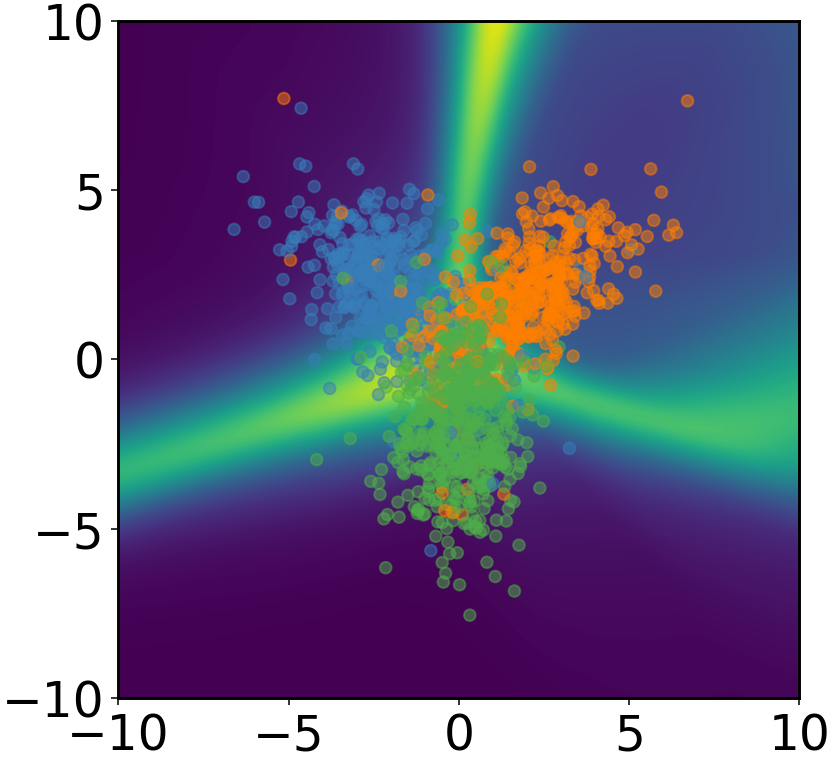

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


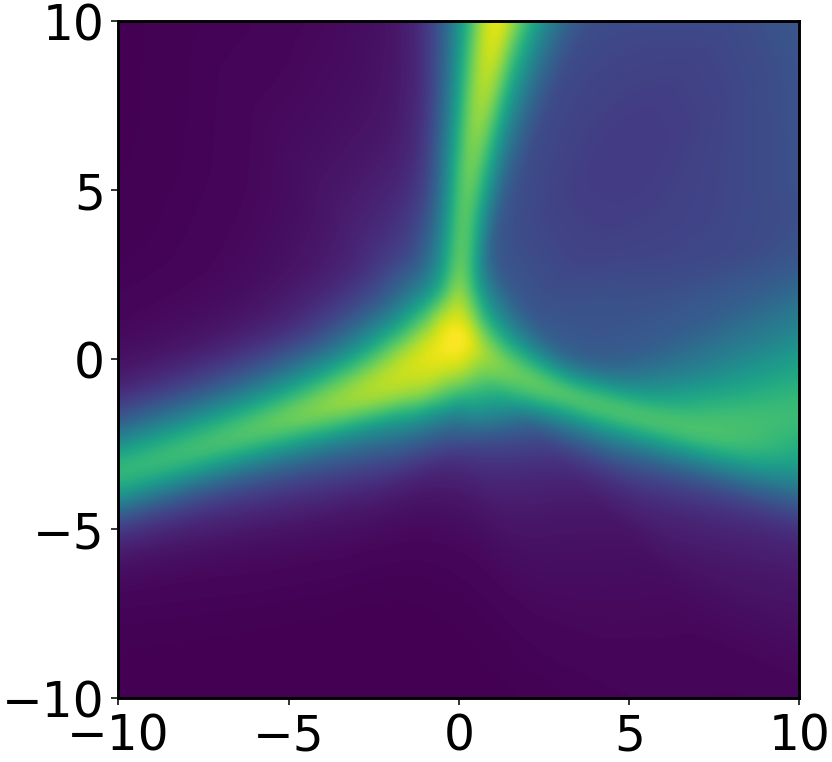

In [20]:
plt.clf()

logits = model.backbone_logits(test_dl, device, return_all=True)
probs = torch.softmax(logits, dim=1)
aleatoric = -torch.sum(probs * torch.log(probs), axis=1).cpu().detach().numpy()
fig, ax = plt.subplots(figsize=(6, 5.5))
pcm = plot_uncertainty_surface(train_data, train_labels, aleatoric, ax=ax, fig6=True)
# plt.colorbar(pcm, ax=ax)
# plt.show()
plt.savefig("aleatoric.pdf")

fig, ax = plt.subplots(figsize=(6, 5.5))
pcm = plot_uncertainty_surface(
    train_data, train_labels, aleatoric, ax=ax, plot_train=False, fig6=True
)
# plt.colorbar(pcm, ax=ax)
# plt.show()
plt.savefig("aleatoric_notrain.pdf")


# Lambda comparisons

In [27]:
def plot_entropy_and_nll(model, lambda_val):
    ll_marg = model.eval_ll_marg(None, device, test_dl, return_all=True)
    ll_marg_cpu = ll_marg.cpu().detach().numpy()
    fig, ax = plt.subplots(figsize=(6, 5.5))
    if lambda_val == "1.0":
        fig, ax = plt.subplots(figsize=(7, 5.5))
    pcm = plot_uncertainty_surface(
        train_data, train_labels, -ll_marg_cpu, ax=ax, plot_train=False, fig6=True
    )
    if lambda_val == "1.0":
        clb = plt.colorbar(pcm, ax=ax)
        clb.ax.tick_params(labelsize=25)
    plt.savefig(f"nll_lambda_{lambda_val}.pdf")


    entropy = model.eval_entropy(None, device, test_dl, return_all=True)
    entropy = entropy.cpu().detach().numpy()
    fig, ax = plt.subplots(figsize=(6, 5.5))
    if lambda_val == "1.0":
        fig, ax = plt.subplots(figsize=(7, 5.5))
    pcm = plot_uncertainty_surface(
        train_data, train_labels, entropy, ax=ax, plot_train=False, fig6=True
    )
    if lambda_val == "1.0":
        clb = plt.colorbar(pcm, ax=ax)
        clb.ax.tick_params(labelsize=25)
    plt.savefig(f"entropy_lambda_{lambda_val}.pdf")

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


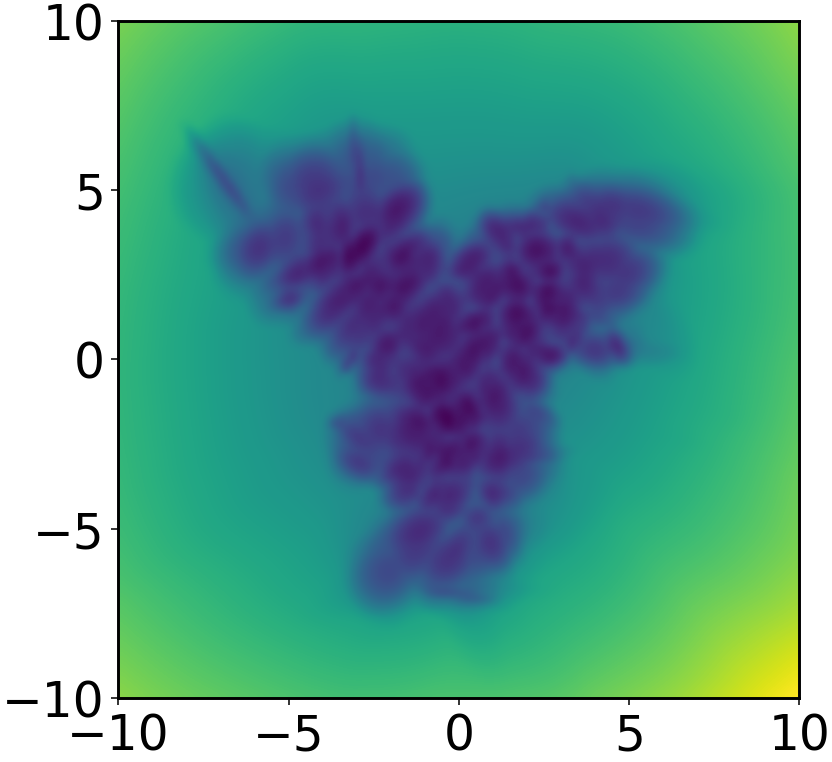

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


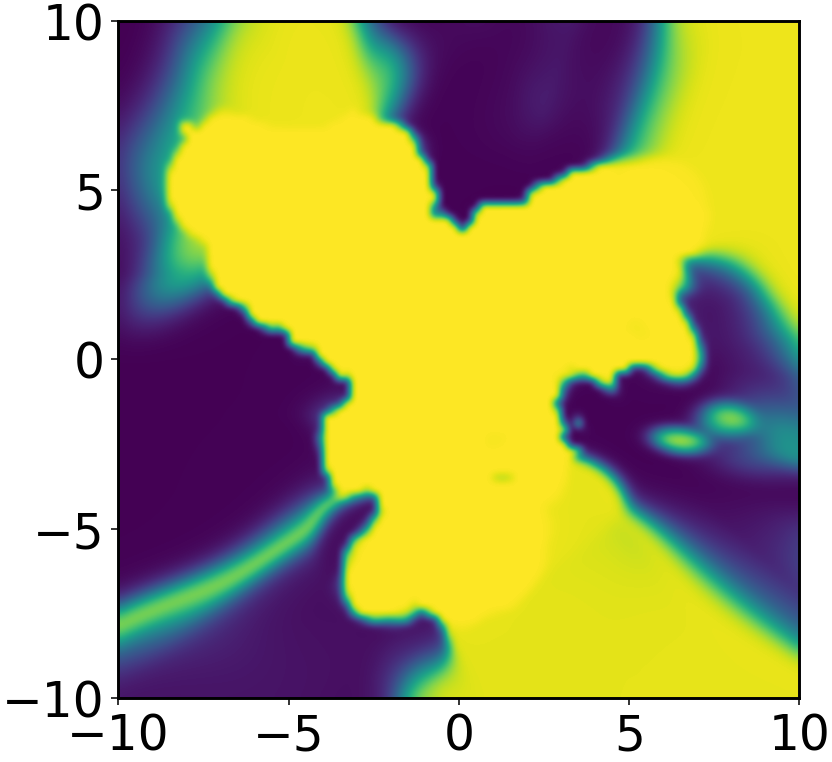

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


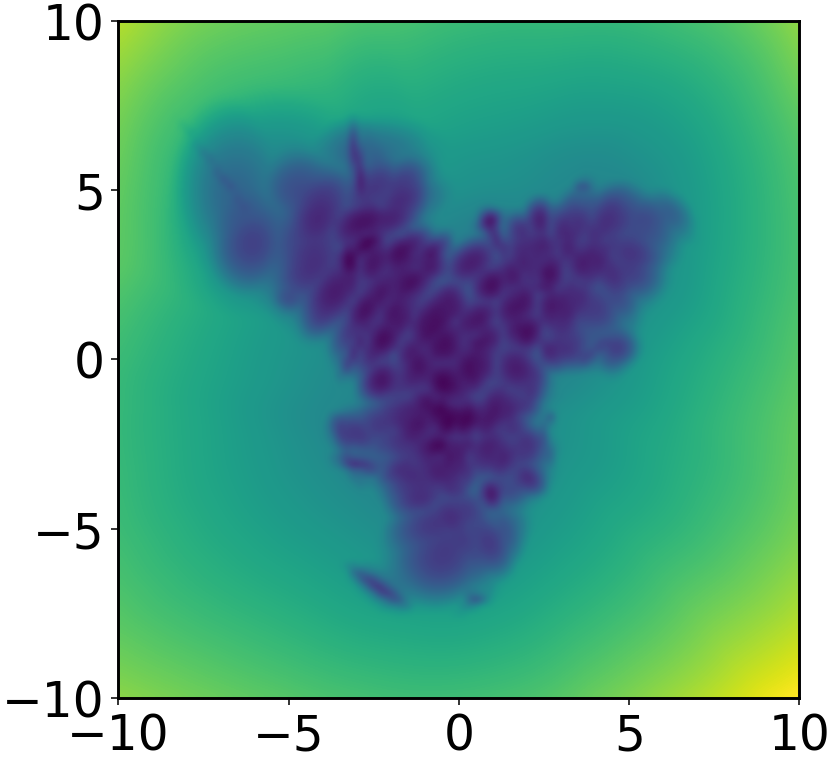

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


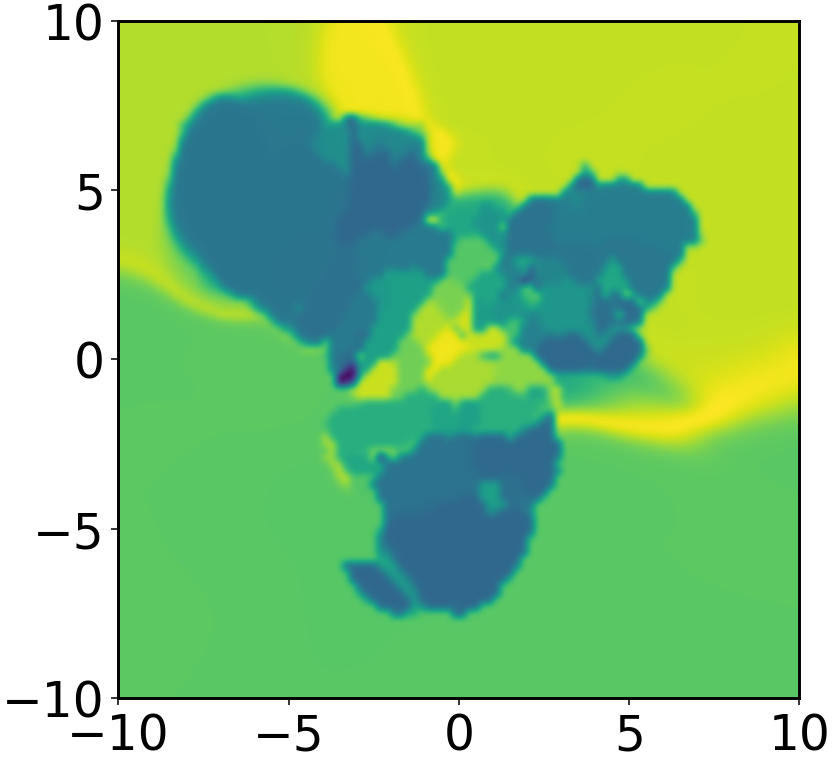

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


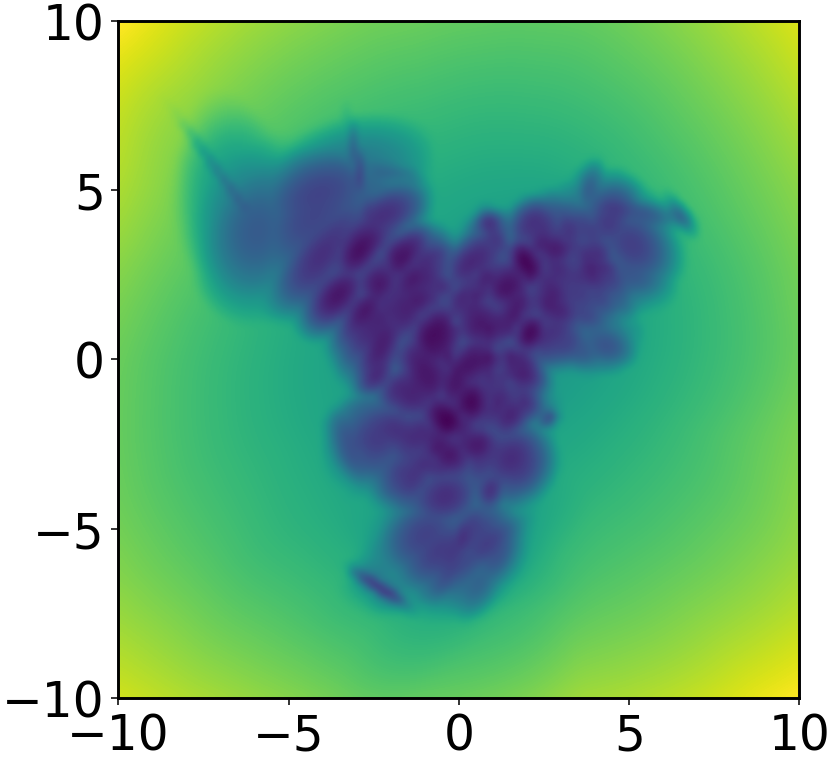

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


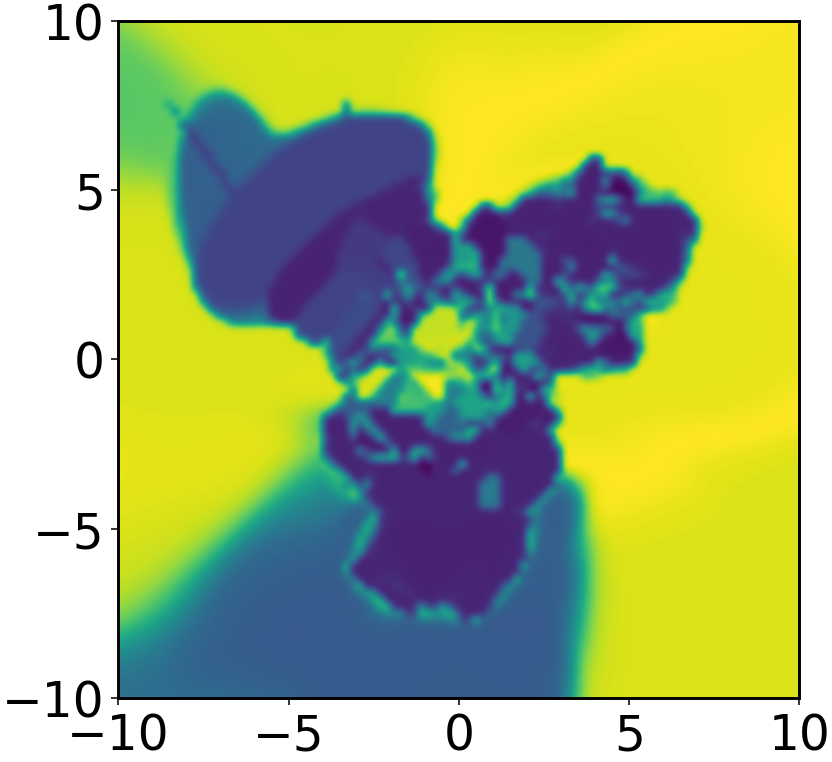

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


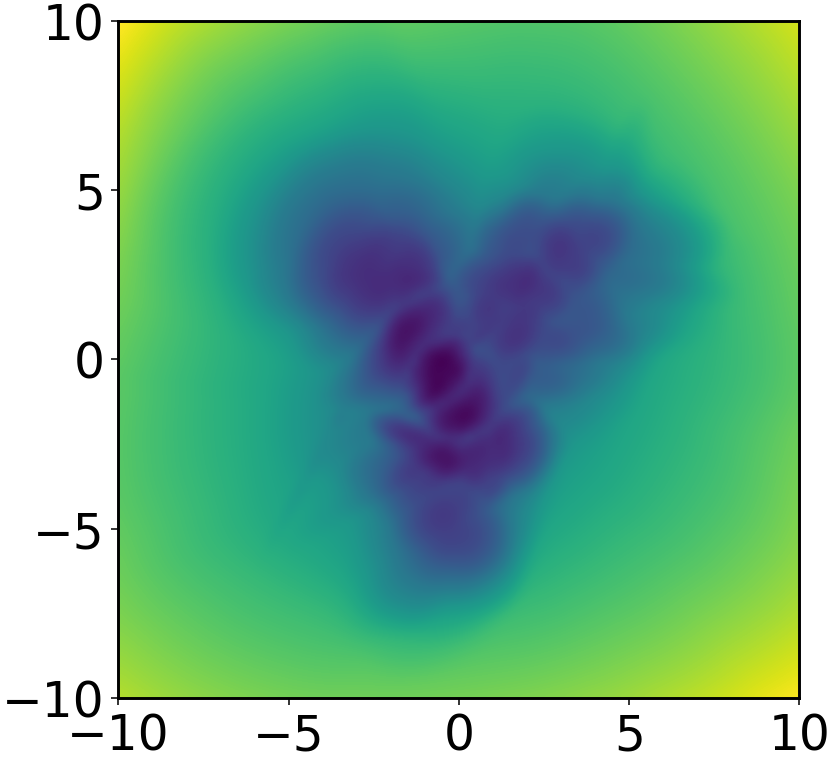

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


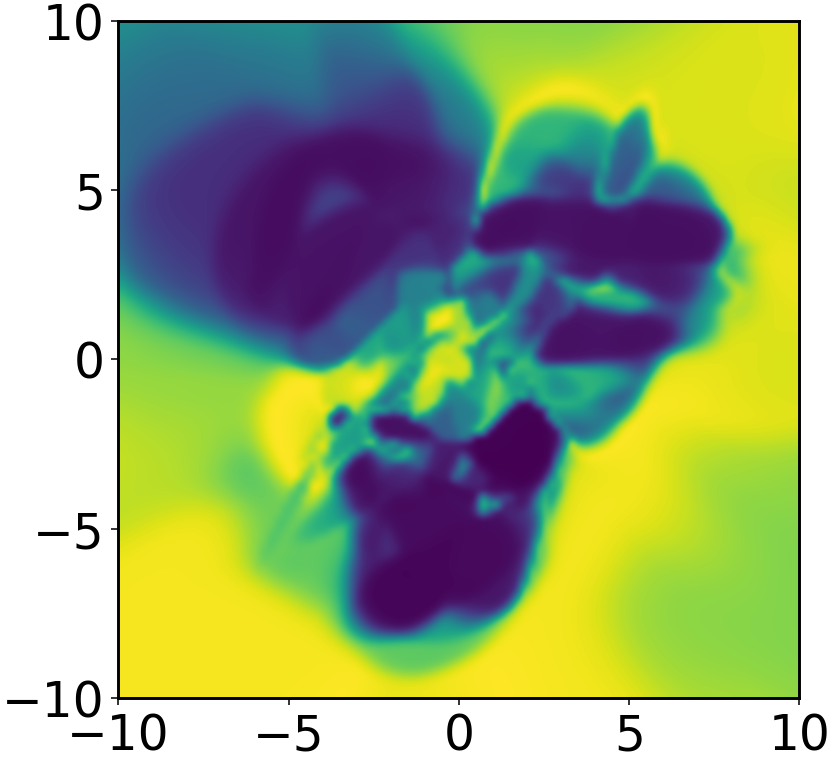

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


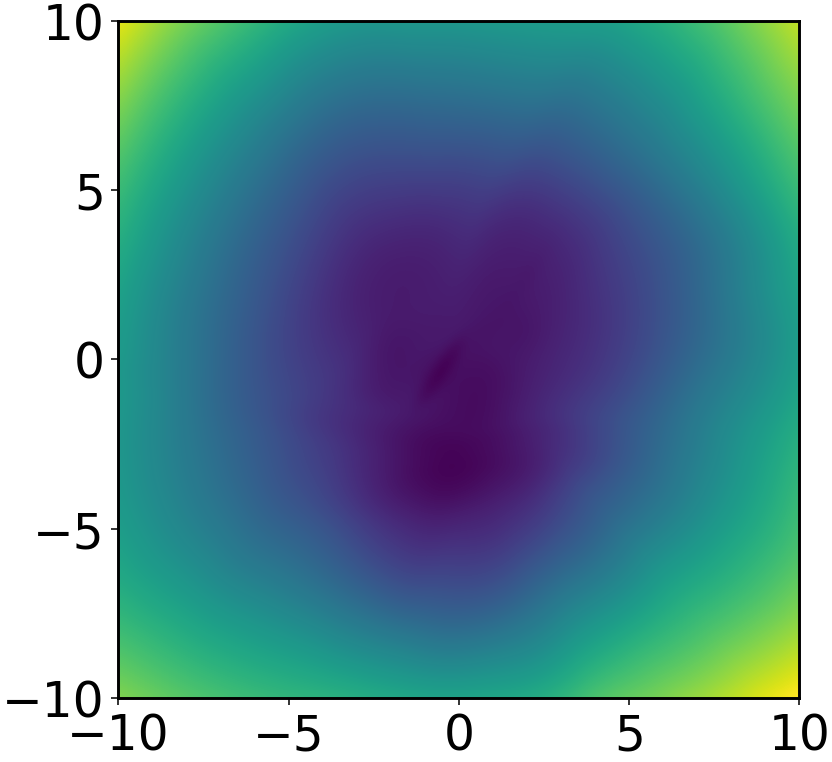

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


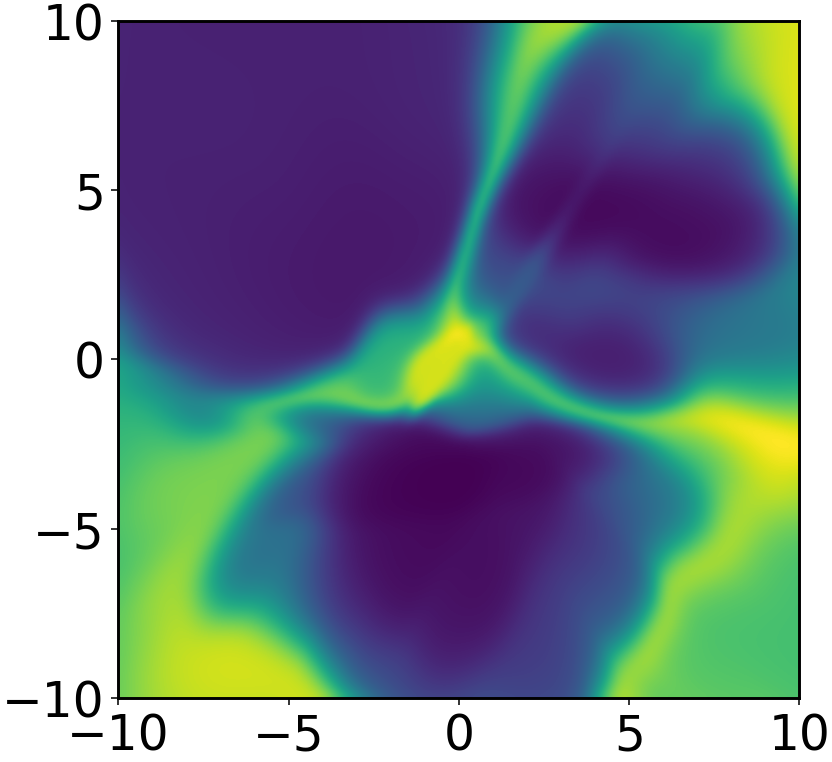

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


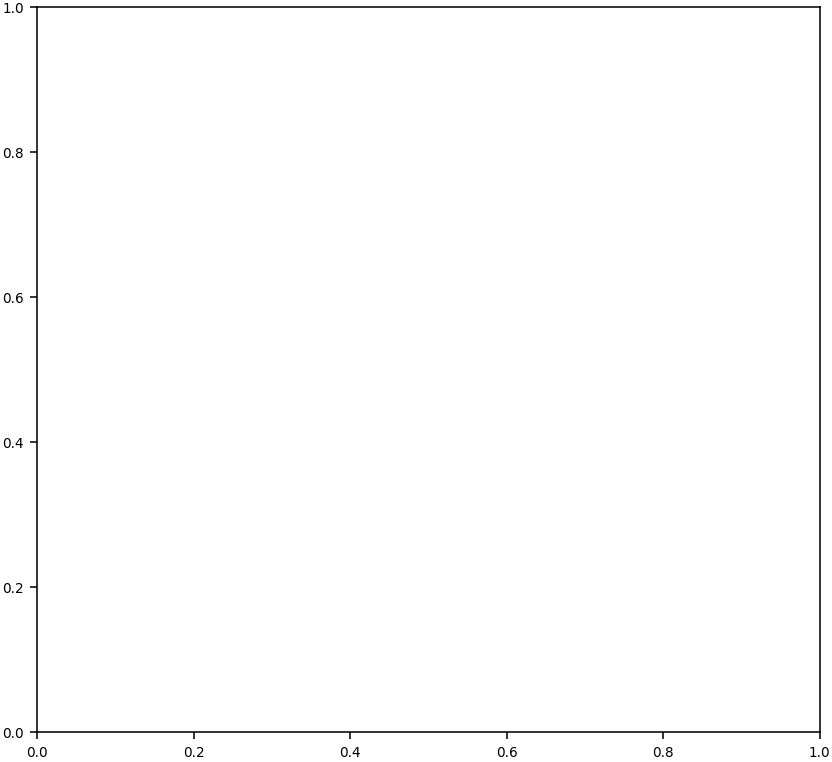

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


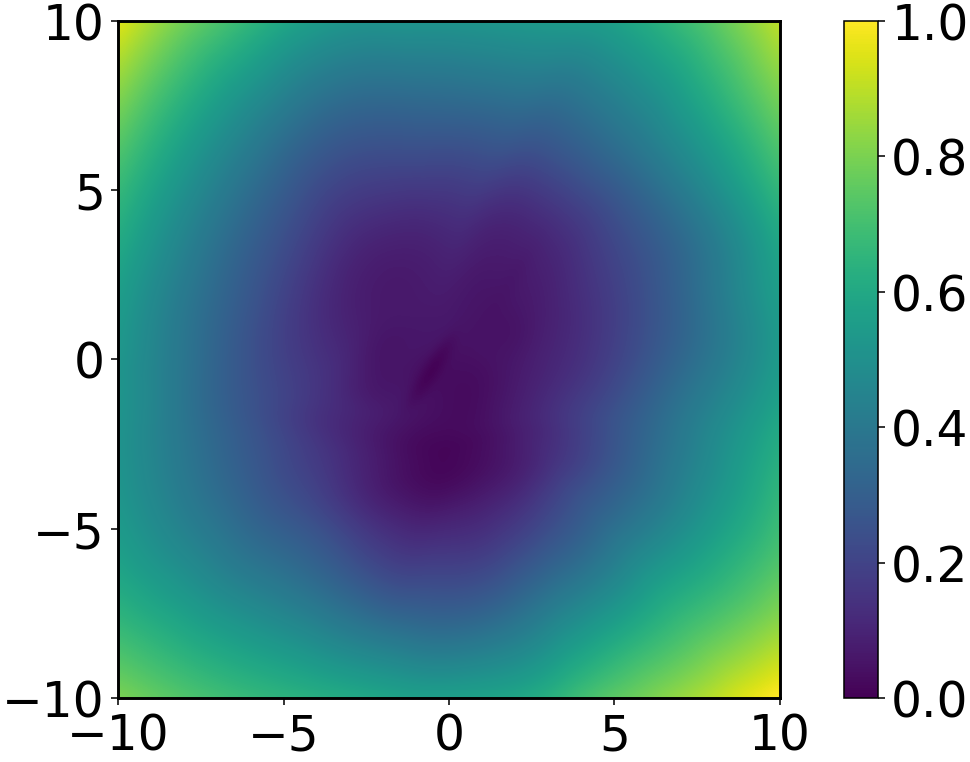

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


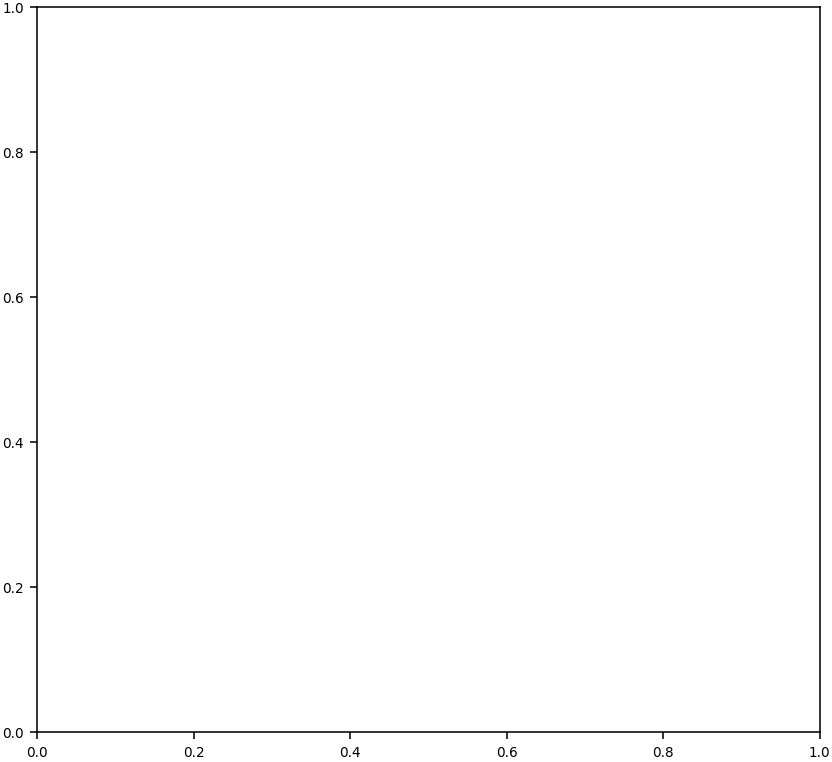

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


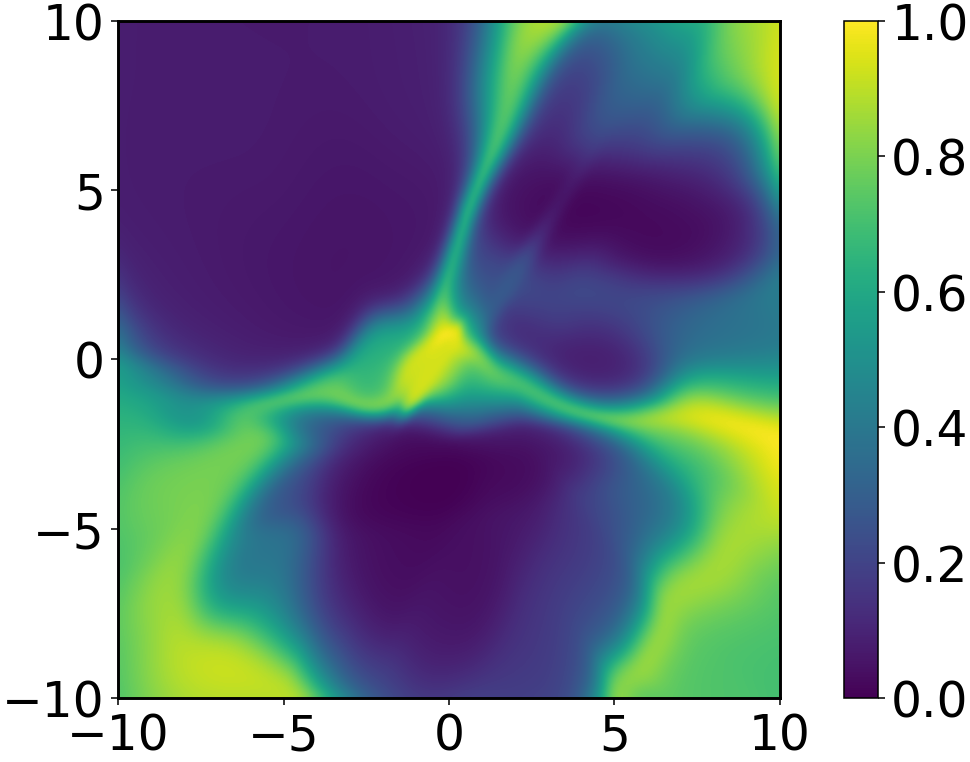

In [28]:
for curr_dict in all_fig_6_dicts:
    model.load_state_dict(torch.load(all_fig_6_dicts[curr_dict], map_location="cpu"))
    model.activate_uncert_head()
    plot_entropy_and_nll(model, curr_dict)